<a href="https://colab.research.google.com/github/GAYARRI/text-classification/blob/master/Embebdins_TF_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
import pandas as pd
from sklearn.cluster import KMeans


# Load the Universal Sentence Encoder model
use_model_url = "https://tfhub.dev/google/universal-sentence-encoder-large/5"
use_model = hub.load(use_model_url)









In [ ]:
#Function to generate sentence embeddings
def generate_sentence_embeddings(sentences):
    embeddings = use_model(sentences)
    return embeddings.numpy()





In [ ]:

input_datapath = 'SalidaBuena_Pro2.xlsx'  # to save space, we provide a pre-filtered dataset

dfmine = pd.read_excel(input_datapath)
dfmine

,Unnamed: 0,idtransparencia,Uno,Dos,Tres,Cuatro,Cinco,Seis,Siete,Ocho,Nueve,Diez
0,0,45348062,absolutism,fernando,france,guardia,cabezas,intervention,sublevacion,sublevacion,restauracion,military
1,1,134157298,abysinia,invasion,japan,germany,france,italy,worldwar,worldwar,africa,colonization
2,2,27544456,academies,18thcentury,sciences,language,finearts,real,exact,exact,natural,spanish
3,3,45347922,academies,18thcentury,sciences,language,finearts,real,exact,exact,natural,spanish
4,4,81796466,adam,smith,liberalism,scottish,politics,18thcentury,religiousreform,religiousreform,thinker,economics
...,...,...,...,...,...,...,...,...,...,...,...,...
1329,1329,27545726,year,treaty,adhesion,Spain,European,community,economic,economic,1977,1985
1330,1330,139712878,year,extinction,FTRE,date,multiplechoice,options,quiz,quiz,assessmenttool,testing
1331,1331,52041290,yugoslavia,independence,republic,kosovo,macedonia,montenegro,1991,1991,groupings,related
1332,1332,52041294,yugoslavia,ethnicity,religion,diversity,territory,majority,bosnia,bosnia,kosovo,groupings


In [ ]:
dfmine['Text']=dfmine['Uno']+" "+dfmine['Dos']+" "+dfmine['Tres']+" "+dfmine['Cuatro']+" "+dfmine['Cinco']+" "+dfmine['Seis']+" "+dfmine['Siete']+" "+dfmine['Ocho']+" "+dfmine['Nueve']+" "+dfmine['Diez']

In [ ]:

# Assuming your dataframe is named 'df' with 1000 rows and 10 features
# Let's assume the column containing sentences is named 'text'

# Extract sentences from the dataframe
sentences = dfmine['Text'].tolist()



In [ ]:
# Generate sentence embeddings
embeddings = generate_sentence_embeddings(sentences)

In [ ]:
# Create a new dataframe with the embeddings
embedding_dfmine = pd.DataFrame(embeddings)


In [ ]:

# Concatenate the embedding dataframe with the original dataframe
dfmine_with_embeddings = pd.concat([dfmine, embedding_dfmine], axis=1)


print(dfmine_with_embeddings)
#In this example, we load the pre-trained Universal Sentence Encoder model using TensorFlow Hub. The generate_sentence_embeddings function takes a list of sentences and generates their corresponding embeddings using the loaded model. We then extract the sentences from the 'text' column of the dataframe, generate the embeddings, and create a new dataframe called embedding_df to store the embeddings. Finally, we concatenate embedding_df with the original dataframe df to obtain df_with_embeddings, which includes the sentence embeddings alongside the original data.

#Make sure to install the necessary dependencies, such as TensorFlow and TensorFlow Hub, before running this code.

      Unnamed: 0  idtransparencia         Uno           Dos        Tres  \
0              0         45348062  absolutism      fernando      france   
1              1        134157298    abysinia      invasion       japan   
2              2         27544456   academies   18thcentury    sciences   
3              3         45347922   academies   18thcentury    sciences   
4              4         81796466        adam         smith  liberalism   
...          ...              ...         ...           ...         ...   
1329        1329         27545726        year        treaty    adhesion   
1330        1330        139712878        year    extinction        FTRE   
1331        1331         52041290  yugoslavia  independence    republic   
1332        1332         52041294  yugoslavia     ethnicity    religion   
1333        1333        138720814  yugoslavia  independence      kosovo   

         Cuatro           Cinco          Seis            Siete  \
0       guardia         cabezas  

In [ ]:
dfmine.iloc[:,:]= dfmine.iloc[:,:].astype(str)


In [ ]:
from sklearn.cluster import KMeans


num_clusters = 20

# Crea una instancia de KMeans
kmeans = KMeans(n_clusters=num_clusters)


In [ ]:
# Ajusta el modelo a tus datos
kmeans.fit(embedding_dfmine)

# Obtiene las etiquetas de los clústeres para cada elemento
dfmine.loc[:,'Texto'] = kmeans.labels_

# Accede a los centroides de los clústeres
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculando SSE:   0%|          | 0/60 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Calculando SSE:   2%|▏         | 1/60 [00:00<00:08,  7.16it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Calculando SSE:   3%|▎         | 2/60 [00:01<00:38,  1.49it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Calculando SSE:   5%|▌         | 3/60 [00:03<01:17,  1.36s/it]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmea

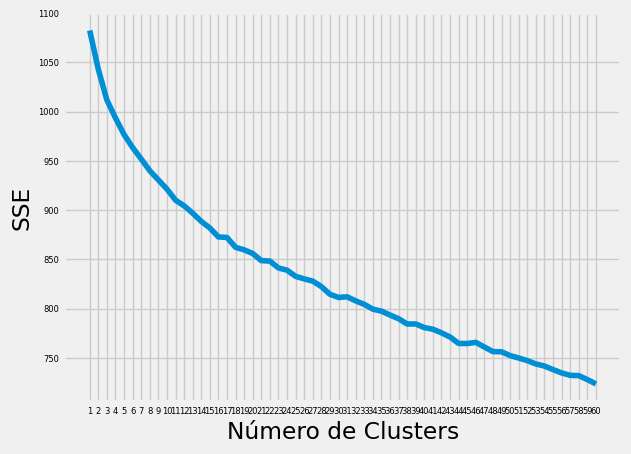

In [ ]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn  as sb

def elbow_method(data,max_k):
    sse = []
    for k in tqdm(range(1, max_k+1),desc="Calculando SSE"):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    return sse



def plot_elbow(sse, max_k):
    plt.style.use("fivethirtyeight")
    plt.plot(range(1, max_k+1), sse)
    plt.xticks(range(1, max_k+1))
    plt.xlabel("Número de Clusters")
    plt.ylabel("SSE")
    plt.tick_params(axis='both', labelsize=6)
    plt.show()

sse = elbow_method(embedding_dfmine, 60)
plot_elbow(sse, 60)


In [ ]:
dfmine.to_excel('Clustering.xlsx')
